### 모듈 import

In [1]:
import numpy as np
import pandas as pd

# visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="white")
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.unicode_minus'] = False    # minus

# interactive
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### 노트북 세팅

In [2]:
# 노트북 세팅
pd.options.display.float_format = '{:.2f}'.format

## 유니콘 기업 재정의
- 2021년 (누적) 기준으로 유니콘 기업으로 선정된 기업들 중 하기 7개 기업의 국민연금 데이터로 분석 방향을 설정함

### 유니콘 기업으로 선정된 기업 정보 수집 
- 출처 : https://www.data.go.kr/data/3046071/fileData.do
- 수집 대상 기업 : 비바리퍼블리카, 쏘카, 무신사, 크래프톤, 야놀자, 에이프로젠, 지피클럽
- 수집 대상 기간 : 2015-2019년 (매년 12월 데이터)

In [ ]:
unicorn2019 = pd.read_csv("국민연금 가입 사업장 내역 2019년 12월.csv", encoding='cp949')
unicorn2018 = pd.read_csv("국민연금 가입 사업장 내역 2018년 12월.csv", encoding='cp949')
unicorn2017 = pd.read_csv("국민연금 가입 사업장 내역 2017년 12월.csv", encoding='cp949')
unicorn2016 = pd.read_csv("국민연금 가입 사업장 내역 2016년 12월.csv", encoding='cp949')
unicorn2015 = pd.read_csv("국민연금 가입 사업장 내역 2015년 12월.csv", encoding='cp949')

In [ ]:
df_unicorn=pd.DataFrame()
unicorn_list = ['비바리퍼블리카$', '쏘카', '주식회사 무신사', '크래프톤', '.주.야놀자$', '.주.에이프로젠$', '지피클럽']
for i in unicorn_list :
    df_unicorn = df_unicorn.append(unicorn2019[unicorn2019['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2018[unicorn2018['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2017[unicorn2017['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2016[unicorn2016['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2015[unicorn2015['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])

# 불필요한 컬럼 제거 및 인덱스 리셋
df_unicorn.drop(df_unicorn.filter(regex='주소|가입상태|우편번호|등록번호|등록일자|사업장업종코드 WKPL|탈퇴일자|구분코드').columns , axis=1, inplace=True)
df_unicorn = df_unicorn.reset_index().drop('index', axis=1)

# 컬럼명 재지정
unicorn_newcol = ['년월','사업장명','업종', '적용일자', '직원수', '연금보험료', '신규취득자수','상실가입자수' ]
df_unicorn.columns = unicorn_newcol

# 연도, 월 컬럼 생성
df_unicorn[['년도','월']]=pd.DataFrame(df_unicorn['년월'].str.split('-',2).tolist())
df_unicorn.drop(['년월','월'], axis=1, inplace=True)
df_unicorn['년도'] = df_unicorn['년도'].astype('int64')

# 7개 유니콘 기업 기본 정보 (trend 파악용)
df_unicorn.to_csv('유니콘기업정보.csv')

In [1525]:
df_unicorn = pd.read_csv('유니콘기업정보.csv').drop('Unnamed: 0', axis=1)
df_unicorn.head()

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019
1,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,158,57709520,5,3,2018
2,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,103,34070000,5,2,2017
3,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,60,17035140,5,3,2016
4,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,27,6171340,0,2,2015


In [188]:
# 데이터 보유 기간 동일
df_unicorn.groupby('사업장명').count()['년도']

사업장명
(주)야놀자        5
(주)에이프로젠      5
(주)크래프톤       5
주식회사 무신사      5
주식회사쏘카        5
（주）비바리퍼블리카    5
（주）지피클럽       5
Name: 년도, dtype: int64

### 유니콘 기업 분석 

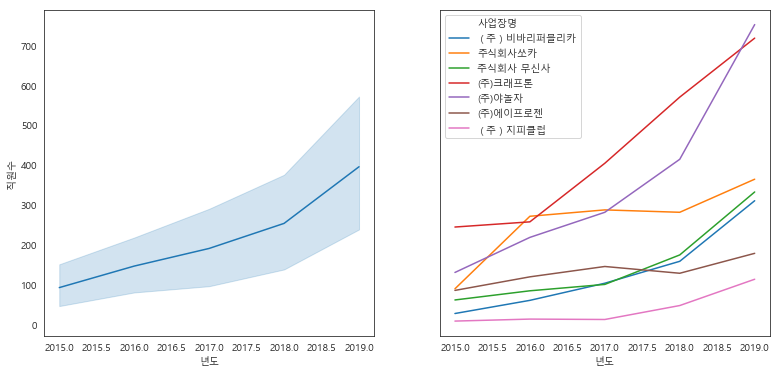

In [189]:
fig, axes = plt.subplots(ncols=2, figsize=(13,6), sharex=True, sharey=True)

sns.lineplot(data = df_unicorn[['사업장명','직원수','년도']], x='년도', y='직원수', ax=axes[0])
sns.lineplot(data = df_unicorn[['사업장명','직원수','년도']], x='년도', y='직원수', hue='사업장명', ax=axes[1])

In [1526]:
# 유니콘 기업별 직원수 연성장율 기업가치 파악
df_unicorn_change = pd.DataFrame(df_unicorn.sort_values(['사업장명','년도']).groupby('사업장명')['직원수'].pct_change(periods=1)).rename(columns={'직원수':'성장율_직원수'}).fillna(0)
df_unicorn_change_total = pd.DataFrame(df_unicorn.sort_values(['사업장명','년도']).groupby('사업장명')['직원수'].pct_change(periods=4)).rename(columns={'직원수':'기간내성장율_직원수'}).fillna(0)

df_unicorn = df_unicorn.merge(df_unicorn_change,how='left', right_index=True,left_index=True)
df_unicorn = df_unicorn.merge(df_unicorn_change_total, how='left', right_index=True,left_index=True)

df_unicorn_growth = df_unicorn.groupby('사업장명').agg({'성장율_직원수':'mean'}).rename(columns={'성장율_직원수':'연평균성장율_직원수'})

# valuation 정보 추가
# valuation 정보는 유니콘 기업 선정시 공개자료 활용
df_unicorn_growth['valuation']=list((1,1.04,5,2.2,1,2.6,1.32))

# 유니콘 기업정보 최종 (직원수 - 성장율, 기간내성장율, 연평균성장율, valuation)
df_unicorn = df_unicorn.merge(df_unicorn_growth, on='사업장명', how='left')
df_unicorn.head(1)

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019,0.96,10.48,0.69,2.60


In [1496]:
df_unicorn.head(5)

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019,0.96,10.48,0.69,2.60
1,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,158,57709520,5,3,2018,0.53,0.00,0.69,2.60
2,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,103,34070000,5,2,2017,0.72,0.00,0.69,2.60
3,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,60,17035140,5,3,2016,1.22,0.00,0.69,2.60
4,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,27,6171340,0,2,2015,0.00,0.00,0.69,2.60


In [1497]:
df_unicorn['사업장명'].unique()

array(['（주）비바리퍼블리카', '주식회사쏘카', '주식회사 무신사', '(주)크래프톤', '(주)야놀자',
       '(주)에이프로젠', '（주）지피클럽'], dtype=object)

In [1539]:
df_unicorn['연금보험료'] = df_unicorn['연금보험료'].apply(lambda x : x/1000000)
df_g = df_unicorn[['사업장명','년도', '직원수','연금보험료']]
df_g.head(2)

,사업장명,년도,직원수,연금보험료
0,（주）비바리퍼블리카,2019,310,118.46
1,（주）비바리퍼블리카,2018,158,57.71


In [1527]:
df_unicorn = df_unicorn.merge(df_unicorn_sales2, on=['사업장명','년도'], how='left')

In [1528]:
df_unicorn.head(1)

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation,매출액
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019,0.96,10.48,0.69,2.60,548.00


In [1529]:
df_unicorn['인당매출액']=df_unicorn['매출액']/df_unicorn['직원수']

In [1541]:
#df_unicorn.groupby('사업장명')['인당매출액'].pct_change(periods=1).fillna(0)

In [1513]:
df_unicorn.corr().filter(regex='valuation').T

,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation,매출액,1인당매출액
valuation,0.36,0.44,-0.05,-0.05,-0.00,-0.09,-0.04,-0.24,1.00,0.48,0.02


In [1424]:
dict_unicorn={'주식회사 무신사': 2019,
 '주식회사쏘카': 2020,
 '(주)야놀자': 2019,
 '(주)에이프로젠': 2019,
 '（주）지피클럽': 2018,
 '(주)크래프톤': 2018,
  '（주）비바리퍼블리카': 2018}

In [1417]:
df_unicorn_sales=df_unicorn_sales.reset_index()

In [1430]:
df_unicorn_sales.T

,0,1,2,3,4,5,6,7,8,9
사업장명,쿠팡,(주)크래프톤,（주）비바리퍼블리카,위메프,주식회사 무신사,（주）지피클럽,엘앤피코스메틱,(주)에이프로젠,(주)야놀자,주식회사쏘카
2016,1130000000.00,NaN,NaN,216500000.00,32900000.00,NaN,188800000.00,NaN,29900000.00,44800000.00
2017,1919500000.00,37200000.00,3400000.00,369100000.00,47000000.00,NaN,401500000.00,68000000.00,33700000.00,90700000.00
2018,2680000000,310400000,20000000,473000000,67700000,49700000,315500000,62100000,54500000,121000000
2019,4340000000,1120000000,54800000,429400000,108100000,513700000,314000000,48100000,73800000,159400000


In [1411]:
dict_unicorn.items()

dict_items([('주식회사 무신사', 2019), ('（주）비바리퍼블리카', 2018), ('주식회사쏘카', 2020), ('(주)야놀자', 2019), ('(주)에이프로젠', 2019), ('（주）지피클럽', 2018), ('(주)크래프톤', 2018)])

In [1542]:
#df_unicorn_sales2

In [1460]:
df_unicorn_sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업장명    40 non-null     object 
 1   년도      40 non-null     int64  
 2   매출액     35 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


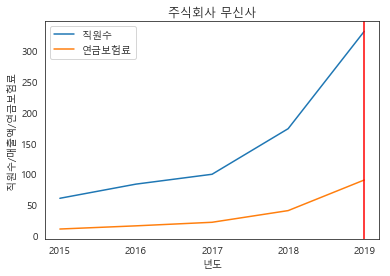

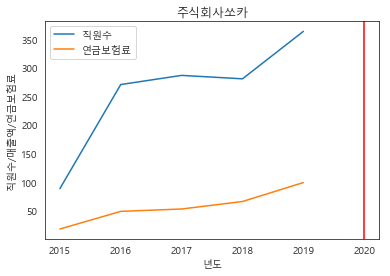

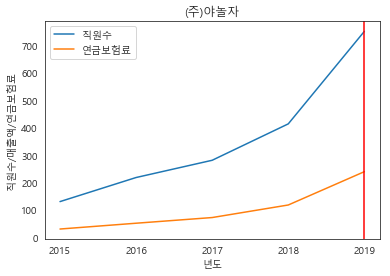

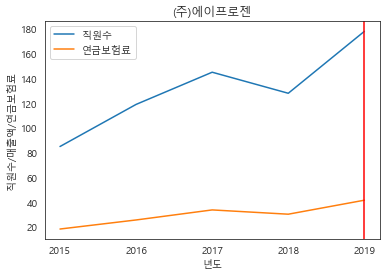

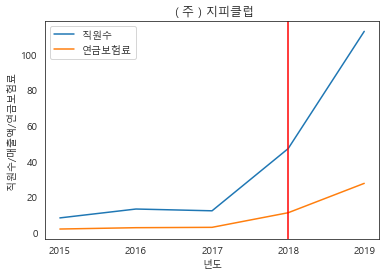

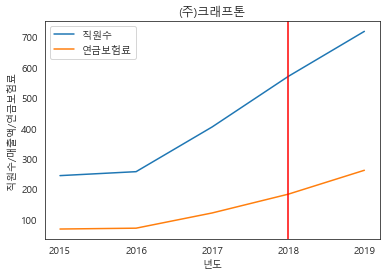

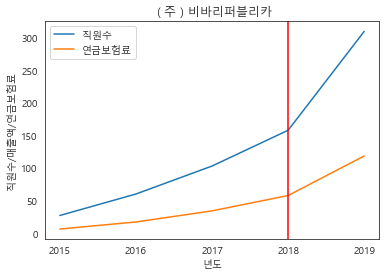

In [1540]:
for company, year in dict_unicorn.items():
    df_g =df_unicorn[['사업장명','년도', '직원수','연금보험료']]
    df_g = df_g[df_g['사업장명'] == company]
    df_s = df_unicorn_sales2[df_unicorn_sales2['사업장명']==company]
    
    # 매출액 변화 그래프 그리기
    #plt.plot(df_s['년도'], df_s['매출액'], label='매출액')          # 억원
    plt.plot(df_g['년도'], df_g['직원수'], label='직원수')          
    plt.plot(df_g['년도'], df_g['연금보험료'], label='연금보험료')   # 만원

    plt.title(f"{company}")
    plt.xlabel('년도')
    plt.ylabel('직원수/매출액/연금보험료')
    plt.legend()
    plt.locator_params(integer=True)
    
    # 유니콘 등재년도 세로줄로 표시
    plt.axvline(x=year, color = 'r')
  
    plt.show()

In [190]:
# plotly
fig = px.line(df_unicorn, x="년도", y="직원수", 
             title='유니콘 기업 연도별 국민연금 가입자 수',
             color='사업장명',
             line_group='사업장명',
             hover_name='사업장명')
fig.update_layout(
    autosize=False,
    width=600,
    height=500)

fig.show()

In [52]:
#df_unicorn[df_unicorn['년도']==2019].filter(regex='직원수|valuation|연금보험료').corr()['valuation']

In [1493]:
df_unicorn.filter(regex='^직원수|연금보험료|valuation').corr()

,직원수,연금보험료
직원수,1.00,0.98
연금보험료,0.98,1.00


In [197]:
df_unicorn.filter(regex='성장율').describe().T

,count,mean,std,min,25%,50%,75%,max
성장율_직원수,35.00,0.50,0.63,-0.12,0.00,0.38,0.70,2.92
기간내성장율_직원수,35.00,1.11,2.95,0.00,0.00,0.00,0.00,13.12
연평균성장율_직원수,35.00,0.50,0.25,0.18,0.26,0.45,0.69,0.97


In [1182]:
df_unicorn_sales = pd.read_csv('../매출액데이터.csv')
df_unicorn_sales = df_unicorn_sales.set_index('사업장명').apply(lambda x : x*100000)
df_unicorn_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
2016,6.00,273816666.67,427445376.24,29900000.00,35875000.00,116800000.00,209575000.00,1130000000.00
2017,9.00,330011111.11,614343337.32,3400000.00,37200000.00,68000000.00,369100000.00,1919500000.00
2018,10.00,415390000.00,810037717.16,20000000.00,56400000.00,94350000.00,314225000.00,2680000000.00
2019,10.00,716130000.00,1314715995.57,48100000.00,82375000.00,236700000.00,492625000.00,4340000000.00


In [1431]:
df_unicorn_sales2 = pd.read_csv('../매출액데이터_V2.csv')

In [1432]:
df_unicorn_sales2

,사업장명,년도,매출액
0,쿠팡,2016,11300.00
1,쿠팡,2017,19195.00
2,쿠팡,2018,26800.00
3,쿠팡,2019,43400.00
4,(주)크래프톤,2016,NaN
5,(주)크래프톤,2017,372.00
6,(주)크래프톤,2018,3104.00
7,(주)크래프톤,2019,11200.00
8,（주）비바리퍼블리카,2016,NaN
9,（주）비바리퍼블리카,2017,34.00


In [1499]:
df_unicorn_growth=pd.DataFrame(df_unicorn_sales.pct_change(axis=1).T.max()).rename(columns={0:'성장율_매출액'}).reset_index()
df_unicorn_growth_ls= df_unicorn_growth.merge(pd.DataFrame(df_unicorn.filter(regex='사업|성장율|valuation').groupby('사업장명').max()[['성장율_직원수','valuation']]).reset_index())
df_unicorn_growth_ls=df_unicorn_growth_ls.rename(columns={'성장율_매출액':'max성장율_매출액','성장율_직원수':'max연평균성장율_직원수'})
df_unicorn_growth_ls.head(1)

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [1377]:
# 표준화
from sklearn.preprocessing import StandardScaler
df_unicorn_growth_ls.iloc[:,1:4]=StandardScaler().fit_transform(df_unicorn_growth_ls.iloc[:,1:4])
df_unicorn_growth_ls.head(1)

,사업장명,max성장율_매출액,max연평균성장율_직원수,valuation
0,(주)크래프톤,1.13,-0.83,2.20


In [1501]:
df_unicorn_growth_ls= df_unicorn_growth.merge(pd.DataFrame(df_unicorn.filter(regex='사업|성장율|valuation').groupby('사업장명').max()[['성장율_직원수','valuation']]).reset_index())
df_unicorn_growth_ls=df_unicorn_growth_ls.rename(columns={'성장율_매출액':'max성장율_매출액','성장율_직원수':'max연평균성장율_직원수','성장율_매출액':'max성장율_연금보험료'})
df_unicorn_growth_ls.corr(method='pearson').filter(regex='valuation') # 상관계수

,valuation
연평균성장율_직원수,-0.21
valuation,1.00
max연평균성장율_직원수,-0.34


In [1379]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
X = df_unicorn_growth_ls[['max성장율_매출액','max연평균성장율_직원수']]      # 독립           
y = df_unicorn_growth_ls['valuation']                                      # 종속
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
# 잔차
residuals = y-prediction
# 결정계수
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)

In [1380]:
print(linear_regression.intercept_)
print('coef of x1&x2 :', linear_regression.coef_)
print('R_squared = ', R_squared)

8.387611204706477e-17
coef of x1&x2 : [ 0.91485518 -0.81766105]
R_squared =  0.7474552506734968


In [1356]:

# 적합도 검증 - 결정계수
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)


R_squared =  0.5132758318357186


In [1319]:
residuals.describe()

count    7.00
mean     0.00
std      0.59
min     -0.81
25%     -0.37
50%     -0.12
75%      0.47
max      0.75
Name: valuation, dtype: float64

In [ ]:
고객만족도지수를 산출하는데 있어 가중치
산출방법에 따라 각 차원의 가중치 크기 및 순위, 그리고
고객만족도지수가 어떻게 달라지는지를 보다 상세히 비
교하는데 목적이 있다. 이를 위해 1) 가중치 산출방법을
주관적 방법과 통계적 방법으로 구분하고, 2) 주관적 방
법인 고정총합법과 통계적 방법인 상관분석, 회귀분석,
주성분분석, 요인분석, 구조방정식을 이용한 가중치를 비
교하며, 3) 각각의 가중치 산출방법에 의한 최종적인 고
객만족도지수를 비교함으로써 고객만족도지수를 구할
때 최선의 방법을 제시하고자 한다.


In [1125]:
df_unicorn.filter(regex='사업|직원')#.groupby('사업장명').max('연평균성장율_직원수')

,사업장명,직원수,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수
0,（주）비바리퍼블리카,310,0.96,10.48,0.69
1,（주）비바리퍼블리카,158,0.53,0.00,0.69
2,（주）비바리퍼블리카,103,0.72,0.00,0.69
3,（주）비바리퍼블리카,60,1.22,0.00,0.69
4,（주）비바리퍼블리카,27,0.00,0.00,0.69
5,주식회사쏘카,364,0.30,3.09,0.48
6,주식회사쏘카,281,-0.02,0.00,0.48
7,주식회사쏘카,287,0.06,0.00,0.48
8,주식회사쏘카,271,2.04,0.00,0.48
9,주식회사쏘카,89,0.00,0.00,0.48


### 데이터 로드

In [223]:
# 원본데이터 nps
nps = pd.read_csv('../company_nps_data.csv', encoding = 'CP949')
df = nps.copy()

In [16]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


### 데이터 개요

In [17]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [18]:
df.columns

Index(['회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'], dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [20]:
df['년도'].describe()   # 2015년 - 2019년

count   99801.00
mean     2016.97
std         0.98
min      2015.00
25%      2016.00
50%      2017.00
75%      2018.00
max      2019.00
Name: 년도, dtype: float64

In [21]:
df['회사ID'].nunique()  # 5000개 회사

5000

In [22]:
df.sort_values(['회사ID','년도','월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
33039,63,11328779396,2018,1,403119840,1006
74251,63,11328779396,2018,2,406770960,1018
80947,63,11328779396,2018,3,404826240,1013
80770,63,11328779396,2018,4,404211800,1012
28110,63,11328779396,2018,5,400339640,1002
...,...,...,...,...,...,...
244,3312354,1451563,2019,9,1312200,3
38757,3312354,1451563,2019,10,1312200,3
49019,3312354,1451563,2019,11,1312200,3
72163,3312354,1451563,2019,12,1312200,3


- 5000개의 회사 데이터
- '회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'
- 대상 기간: 2015년 - 2019년 (회사마다 데이터 보유기간 상이)

### 전처리

In [348]:
df = df.drop(index=df.query('연매출액 < 0').index)
df = df.drop(index=df.query('월별_직원수 == 0').index)

In [350]:
# 1인당 매출액 추가
df.loc[:,'인당_매출액'] = df.loc[:, '연매출액'] / df.loc[:, '월별_직원수']

In [355]:
print('전처리 후 기업 수 :', df['회사ID'].nunique())

전처리 후 기업 수 : 4998


## EDA
**EDA 목적 :유니콘 지수 산출**
>   - 데이터 파악 및 전처리 작업으로 최종 분석 데이터셋 구성
>   - 최종 분석 데이터셋으로 유니콘 지수 산출 (스코어링에 필요한 지표 및 가중치 파악)

In [358]:
# df_eda : 회사ID/년도/월별 sorting 데이터 셋
df_eda = df.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)
df_eda.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
0,63,11328779396,2018,1,403119840,1006,11261212.12
1,63,11328779396,2018,2,406770960,1018,11128466.99
2,63,11328779396,2018,3,404826240,1013,11183395.26
3,63,11328779396,2018,4,404211800,1012,11194446.04
4,63,11328779396,2018,5,400339640,1002,11306167.06


### 분석대상 필터링


#### 분석대상금액 (연매출액기준)
- 기준 : 연매출액 1000억원 이상
- 근거 : 유니콘 기업들 등재시점 기준 연매출액 1000억원 이상

In [359]:
# 2019년 매출액 정보 있으면서 천억이상이 아닌 기업
sales_list = list(df_eda.query('년도==2019&연매출액<100000000')['회사ID'].unique())
df_eda = df_eda[~df_eda['회사ID'].isin(sales_list)].reset_index().drop('index',axis=1)
print('df_eda shape :', df_eda.shape)
print('raw data 기업 수 :', df['회사ID'].nunique())
print('분석대상금액 필터링 후 기업 수 :', df_eda['회사ID'].nunique())

df_eda shape : (97662, 7)
raw data 기업 수 : 4998
분석대상금액 필터링 후 기업 수 : 4928


데이터 보유기간 1년 이하 기업 수 : 2407


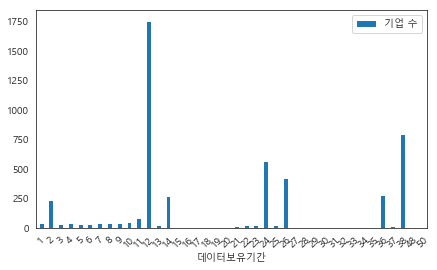

In [449]:
df_periodsize = pd.DataFrame(df_eda.groupby('회사ID').size()).reset_index().rename(columns={0:'데이터보유기간'})
df_periodsize.groupby('데이터보유기간').count().rename(columns={'회사ID':'기업 수'}).plot.bar(rot=45, figsize=(7,4))
print('데이터 보유기간 1년 이하 기업 수 :', df_periodsize.query('데이터보유기간<=12')['회사ID'].nunique())

#### 분석대상기간 (1년이하)
- 기준 : 데이터 기간 1년 이하
- 근거 : 

**데이터기간 1년이하인 기업들 중 높은 직원성장율을 보이는 곳이 있는지 파악하고자 함**

In [450]:
# 1년 이하의 데이터만 존재하는 기업 데이터 셋
less_list = df_periodsize.query('데이터보유기간<=12')['회사ID'].to_list()
df_less = df_eda[df_eda['회사ID'].isin(less_list)].sort_values(['회사ID','년도','월']).reset_index()

# 시작 시점 (기준시점)
df_less_start = df_less[df_less['index'].isin(list(df_less.groupby('회사ID').agg({'index':'min'})['index']))]
df_less_start = df_less_start.drop('index', axis=1).rename(columns={'월별_연금보험료': '기준_연금보험료',
                                                                  '월별_직원수':'기준_직원수',
                                                                  '연매출액':'기준_연매출액',
                                                                  '년도' :'기준_년도',
                                                                  '월':'기준_월',
                                                                     '인당_매출액':'기준_인당매출액'})
# 마지막 시점 (비교시점)
df_less_end = df_less[df_less['index'].isin(list(df_less.groupby('회사ID').agg({'index':'max'})['index']))]
df_less_end = df_less_end.drop('index', axis=1).rename(columns={'월별_연금보험료': '비교_연금보험료',
                                                              '월별_직원수':'비교_직원수',         
                                                              '연매출액':'비교_연매출액',
                                                              '년도' :'비교_년도',  
                                                              '월':'비교_월',
                                                               '인당_매출액':'비교_인당매출액'})
#merge전 shape 체크
#print(df_less_start.shape)
#print(df_less_end.shape)

# 1년 이하 기업들의 기간내 성장율, 증감 파악
df_less_growth = df_less_start.merge(df_less_end, on='회사ID', how='inner')

# 지표별 기간내 성장율 변수 추가
df_less_growth['성장율_연금보험료'] = (df_less_growth['비교_연금보험료']-df_less_growth['기준_연금보험료'])/df_less_growth['기준_연금보험료']
df_less_growth['성장율_직원수'] = (df_less_growth['비교_직원수']-df_less_growth['기준_직원수'])/df_less_growth['기준_직원수']
# 대상기간이 1년보다 짧기 때문에 0일 가능성 높음
df_less_growth['성장율_연매출액'] = (df_less_growth['비교_연매출액']-df_less_growth['기준_연매출액'])/df_less_growth['기준_연매출액']
df_less_growth.head(1) 

# 지표별 기간내 증감 변수 추가
df_less_growth['증감_연금보험료'] = (df_less_growth['비교_연금보험료']-df_less_growth['기준_연금보험료'])
df_less_growth['증감_직원수'] = (df_less_growth['비교_직원수']-df_less_growth['기준_직원수'])
# 대상기간이 1년보다 짧기 때문에 0일 가능성 높음
df_less_growth['증감_연매출액'] = (df_less_growth['비교_연매출액']-df_less_growth['기준_연매출액'])

In [451]:
# 유니콘 기업 연평균 직원성장율 중위값 (0.18) 기준으로 높은 직원성장율 보인 곳 
print(df_less_growth.query('성장율_직원수>=0.45')['회사ID'].count())
df_less_growth.query('성장율_직원수>=0.45')

255


,회사ID,기준_연매출액,기준_년도,기준_월,기준_연금보험료,기준_직원수,기준_인당매출액,비교_연매출액,비교_년도,비교_월,비교_연금보험료,비교_직원수,비교_인당매출액,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
9,1125,53713870,2018,1,11197120,42,1278901.67,53713870,2018,12,43293280,137,392072.04,2.87,2.26,0.00,32096160,95,0
11,1807,5631138,2018,1,8205240,47,119811.45,5631138,2018,12,17526500,92,61208.02,1.14,0.96,0.00,9321260,45,0
19,3611,3955788,2018,1,301680,3,1318596.00,3955788,2018,12,5530120,38,104099.68,17.33,11.67,0.00,5228440,35,0
24,5202,90027705,2018,1,8594100,27,3334359.44,90027705,2018,12,15087700,45,2000615.67,0.76,0.67,0.00,6493600,18,0
28,6438,3770065,2018,1,2212900,19,198424.47,3770065,2018,12,5160360,34,110884.26,1.33,0.79,0.00,2947460,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,635082,36069908,2018,1,29336740,139,259495.74,36069908,2018,12,50945840,254,142007.51,0.74,0.83,0.00,21609100,115,0
2390,782086,3845136,2018,9,1219300,5,769027.20,3845136,2018,12,1395000,8,480642.00,0.14,0.60,0.00,175700,3,0
2395,900163,836891,2018,2,442800,3,278963.67,836891,2018,12,916460,6,139481.83,1.07,1.00,0.00,473660,3,0
2396,918661,258590,2018,1,332900,3,86196.67,258590,2018,12,867140,6,43098.33,1.60,1.00,0.00,534240,3,0


In [663]:
df_less_growth.query('성장율_직원수>=0.45')

,회사ID,기준_연매출액,기준_년도,기준_월,기준_연금보험료,기준_직원수,기준_인당매출액,비교_연매출액,비교_년도,비교_월,비교_연금보험료,비교_직원수,비교_인당매출액,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
9,1125,53713870,2018,1,11197120,42,1278901.67,53713870,2018,12,43293280,137,392072.04,2.87,2.26,0.00,32096160,95,0
11,1807,5631138,2018,1,8205240,47,119811.45,5631138,2018,12,17526500,92,61208.02,1.14,0.96,0.00,9321260,45,0
19,3611,3955788,2018,1,301680,3,1318596.00,3955788,2018,12,5530120,38,104099.68,17.33,11.67,0.00,5228440,35,0
24,5202,90027705,2018,1,8594100,27,3334359.44,90027705,2018,12,15087700,45,2000615.67,0.76,0.67,0.00,6493600,18,0
28,6438,3770065,2018,1,2212900,19,198424.47,3770065,2018,12,5160360,34,110884.26,1.33,0.79,0.00,2947460,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,635082,36069908,2018,1,29336740,139,259495.74,36069908,2018,12,50945840,254,142007.51,0.74,0.83,0.00,21609100,115,0
2390,782086,3845136,2018,9,1219300,5,769027.20,3845136,2018,12,1395000,8,480642.00,0.14,0.60,0.00,175700,3,0
2395,900163,836891,2018,2,442800,3,278963.67,836891,2018,12,916460,6,139481.83,1.07,1.00,0.00,473660,3,0
2396,918661,258590,2018,1,332900,3,86196.67,258590,2018,12,867140,6,43098.33,1.60,1.00,0.00,534240,3,0


In [342]:
df_unicorn.filter(regex='성장율').describe().T

,count,mean,std,min,25%,50%,75%,max
성장율_직원수,35.00,0.50,0.63,-0.12,0.00,0.38,0.70,2.92
기간내성장율_직원수,35.00,1.11,2.95,0.00,0.00,0.00,0.00,13.12
연평균성장율_직원수,35.00,0.50,0.25,0.18,0.26,0.45,0.69,0.97


**데이터 기간 1년 이하인 기업들(2407개) 중 직원성장율 0.45 이상 기업**

In [452]:
# 유니콘 기업의 직원 수 연평균성장율 0.4 이상인 기업 
print('유니콘 기업의 직원 수 연평균성장율 0.45 이상인 기업 :', df_unicorn.query('연평균성장율_직원수>=0.45')['사업장명'].nunique())
print(df_unicorn.query('연평균성장율_직원수>=0.45')['사업장명'].unique())

유니콘 기업의 직원 수 연평균성장율 0.45 이상인 기업 : 4
['（주）비바리퍼블리카' '주식회사쏘카' '(주)야놀자' '（주）지피클럽']


**높은 직원 성장율을 보인 상기 기업을 제외한 데이터1년이하 기업 필터링**

In [472]:
print('raw data 기업 수 :', df['회사ID'].nunique())
print('분석대상금액 필터링 후 기업 수 :', df_eda['회사ID'].nunique())
# df_eda_filtered :매출액 1000억 기준, 데이터기간 1년 기준 필터링 후 데이터 셋
df_eda_filtered_less = df_eda[~df_eda['회사ID'].isin(df_less_growth.query('성장율_직원수<=0.45')['회사ID'].to_list())].reset_index().drop('index', axis=1)
print('분석대상금액 필터링 후 기업 수 :', df_eda_filtered['회사ID'].nunique())

raw data 기업 수 : 4998
분석대상금액 필터링 후 기업 수 : 4928
분석대상금액 필터링 후 기업 수 : 2776


**df_eda_filtered_less : 분석대상, 분석기간 필터링 후 데이터셋**
- 2776개의 기업
- 2019년 데이터 있는 경우, 연매출액 1000억 이상
- 데이터 기간 1년 이하인 경우 직원수 성장율 0.45이상

## 연성장율 : df_growth_cleansed
> - 회사 ID별로 데이터 기간 상이하나, **회사 ID별 연평균 (연금보험료/직원수/연매출액)성장율을 파악하고자 함**

#### 성장율 분석 데이터셋

In [882]:
df_eda_filtered = df_eda[~df_eda['회사ID'].isin(less_list)].sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)
df_eda_filtered.head(2)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
0,44851,939238,2016,1,1181140,8,117404.75
1,44851,939238,2016,2,1181140,8,117404.75


In [788]:
df_eda_filtered.shape

(73191, 7)

**df_eda_filtered : 분석대상, 분석기간 필터링 후 데이터셋**
- 2776개의 기업
- 2019년 데이터 있는 경우, 연매출액 1000억 이상
- 데이터 기간 1년 초과 

### 월별 데이터 있는 변수 : 직원수, 연금보험료, 인당매출액
key = 회사ID + - + 년도
1. 월별성장율 계산
2. 년도별로 월별성장율 평균 계산

In [883]:
df_eda_filtered=df_eda_filtered.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)

# df_eda_filtered.info()
df_eda_filtered=df_eda_filtered.astype({'회사ID':str, '년도':str,'월':str})
df_eda_filtered['key'] = df_eda_filtered['회사ID']+"-"+df_eda_filtered['년도']
df_eda_filtered=df_eda_filtered.astype({'회사ID':int, '년도':int,'월':int})

# index : key(회사ID+년도)로 설정
df_eda_filtered.set_index('key', inplace=True)

In [884]:
# 월별 성장율 
#df_eda_filtered.sort_values(['회사ID','년도','월']).filter(regex='연금|직원|인당').groupby('key').pct_change()#.groupby('key').agg('mean')

# 평균 성장율
df_eda_filtered.sort_values(['회사ID','년도','월']).filter(regex='연금|직원|인당').groupby('key').pct_change().groupby('key').agg('mean')
df_growth_monthly = df_eda_filtered.sort_values(['회사ID','년도','월']).filter(regex='월|연금|직원|인당').groupby('key').pct_change().groupby('key').agg('mean')
df_growth_monthly = df_growth_monthly.drop('월',axis=1).rename(columns = {'월별_연금보험료':'평균성장율_연금보험료',
                                                      '월별_직원수':'평균성장율_직원수',
                                                      '인당_매출액':'평균성장율_인당매출액'})
df_growth_monthly.shape

(7480, 3)

### 연도별 데이터 있는 변수 : 매출액
1. 연도별 성장율 계산

In [885]:
df_growth_yearly = df_eda_filtered.filter(regex='연매출액').groupby('key').agg('mean')
df_growth_yearly.reset_index(inplace=True)

# 회사ID 변수 추가
df_growth_yearly['회사ID']=pd.DataFrame(df_growth_yearly['key'].str.split('-',2).tolist())[0]
df_growth_yearly=df_growth_yearly.astype({'회사ID':'int'})
# key유지, 회사별 성장율_연매출액 
df_growth_yearly = df_growth_yearly.set_index('key').groupby('회사ID').pct_change().rename(columns={'연매출액':'성장율_연매출액'})
df_growth_yearly.shape

(7480, 1)

### 지수 산출용 데이터셋

In [892]:
# index = key 기준 inner join
df_growth = df_growth_monthly.merge(df_growth_yearly, left_index=True,right_index=True, how='inner')
print(df_growth.shape)
df_growth.head()

(7480, 4)


,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액
key,,,,
122968-2015,-0.00,0.00,0.00,NaN
122968-2016,0.02,0.01,-0.01,-0.28
122968-2017,0.00,0.00,0.00,0.23
122968-2018,0.00,0.00,-0.00,-0.04
122983-2015,-0.01,-0.02,0.02,NaN


In [897]:
# %로 전환
df_growth = df_growth.apply(lambda x : x*100)
df_growth.reset_index(inplace=True)
df_growth[['회사ID','년도']]=pd.DataFrame(df_growth['key'].str.split('-',2).tolist())
df_growth.head()

,key,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액,회사ID,년도
0,122968-2015,-0.28,0.00,0.00,NaN,122968,2015
1,122968-2016,2.26,1.40,-1.16,-28.21,122968,2016
2,122968-2017,0.15,0.44,0.44,22.86,122968,2017
3,122968-2018,0.38,0.27,-0.02,-4.50,122968,2018
4,122983-2015,-1.18,-1.56,1.59,NaN,122983,2015


In [899]:
df_growth_cleansed = df_growth.dropna(axis=0)
print(df_growth_cleansed['회사ID'].nunique())
print(df_growth_cleansed.shape)
df_growth_cleansed.groupby('년도').agg({'회사ID':'count'})

2521
(4958, 7)


,회사ID
년도,
2016,1544
2017,1436
2018,1974
2019,4


## 경기고려가중치추가 : df_growth_cleansed
**동행지수순환변동치 평균값이 낮을 수록 높게 부여 > 경기가 안좋음에도 성장율이 높은 경우 극대화**
- 4개 연도별 가중치변수적용 def eco

In [929]:
년도 = [2016,2017,2018,2019]
평균_동행지수순환변동치 = [0.0250, 0.4333, 0.3667, 0.1333]
eco = pd.DataFrame()
eco['년도']=년도
eco=eco.astype({'년도':'object'}) # merge 시 충돌
eco['평균_동행지수순환변동치'] = 평균_동행지수순환변동치
eco

,년도,평균_동행지수순환변동치
0,2016,0.03
1,2017,0.43
2,2018,0.37
3,2019,0.13


In [930]:
eco.describe().T

,count,mean,std,min,25%,50%,75%,max
평균_동행지수순환변동치,4.00,0.24,0.19,0.03,0.11,0.25,0.38,0.43


In [931]:
eco['경기지수점수'] = [0.4,0.1,0.2,0.3]
eco

,년도,평균_동행지수순환변동치,경기지수점수
0,2016,0.03,0.40
1,2017,0.43,0.10
2,2018,0.37,0.20
3,2019,0.13,0.30


In [942]:
def eco(x):
    if x==2016: return 0.4
    elif x==2017: return 0.1
    elif x==2018: return 0.2
    else: return 0.3

In [943]:
df_growth_cleansed['경기지수점수']=df['년도'].apply(eco)

## 유니콘 지수 산출
**(직원수성장율 * 경기지수점수) + (매출액성장율 * 경기지수점수) **
- 스코어링으로 진행하는지? 

### 표준화 X : df_unicorn_indicator

In [985]:
# 분석 데이터 유지
df_unicorn_indicator = df_growth_cleansed.copy()

In [979]:
df_growth_cleansed

,key,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액,회사ID,년도,경기지수점수
1,122968-2016,2.26,1.40,-1.16,-28.21,122968,2016,0.20
2,122968-2017,0.15,0.44,0.44,22.86,122968,2017,0.20
3,122968-2018,0.38,0.27,-0.02,-4.50,122968,2018,0.30
5,122983-2016,0.04,0.00,0.30,-16.07,122983,2016,0.20
6,122983-2017,-3.27,-4.10,8.92,-53.33,122983,2017,0.40
...,...,...,...,...,...,...,...,...
7474,516653-2017,2.93,2.27,-1.82,12.08,516653,2017,0.20
7475,516653-2018,7.29,5.21,-0.83,-23.33,516653,2018,0.40
7477,59533-2016,2.03,1.82,-1.52,6.71,59533,2016,0.40
7478,59533-2017,-1.64,-1.52,1.82,-40.17,59533,2017,0.40


In [982]:
df_unicorn_indicator['유니콘지수_직원수&매출액']= df_unicorn_indicator['경기지수점수']*(df_unicorn_indicator['평균성장율_직원수']+df_unicorn_indicator['성장율_연매출액'])
df_unicorn_indicator=df_unicorn_indicator.groupby('회사ID').agg({'유니콘지수_직원수&매출액':'mean'})

In [1053]:
df_unicorn_indicator.describe().T

,count,mean,std,min,25%,50%,75%,max
평균성장율_연금보험료,4958.00,1.03,3.34,-16.10,-0.30,0.61,1.82,58.01
평균성장율_직원수,4958.00,0.55,3.29,-14.82,-0.73,0.12,1.34,71.94
평균성장율_인당매출액,4958.00,0.37,3.53,-35.29,-0.82,0.04,1.21,151.43
성장율_연매출액,4958.00,32.80,477.26,-99.96,-11.52,5.04,26.83,28996.85
경기지수점수,4956.00,0.26,0.12,0.10,0.20,0.20,0.40,0.40


In [1055]:
df_unicorn_indicator

,key,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액,회사ID,년도,경기지수점수
1,122968-2016,2.26,1.40,-1.16,-28.21,122968,2016,0.20
2,122968-2017,0.15,0.44,0.44,22.86,122968,2017,0.20
3,122968-2018,0.38,0.27,-0.02,-4.50,122968,2018,0.30
5,122983-2016,0.04,0.00,0.30,-16.07,122983,2016,0.20
6,122983-2017,-3.27,-4.10,8.92,-53.33,122983,2017,0.40
...,...,...,...,...,...,...,...,...
7474,516653-2017,2.93,2.27,-1.82,12.08,516653,2017,0.20
7475,516653-2018,7.29,5.21,-0.83,-23.33,516653,2018,0.40
7477,59533-2016,2.03,1.82,-1.52,6.71,59533,2016,0.40
7478,59533-2017,-1.64,-1.52,1.82,-40.17,59533,2017,0.40


In [959]:
df_unicorn_indicator.filter(regex='유니콘').sort_values('유니콘지수_직원수&매출액', ascending=False).head(5)

,유니콘지수_직원수&매출액
회사ID,
268810,2930.86
242254,2446.62
417469,1906.98
184149,1396.67
433756,911.25


In [1054]:
df_unicorn_indicator.query('회사ID==294337')

,key,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액,회사ID,년도,경기지수점수


In [972]:
# 유니콘 기업 5개 리스트
unicorn_test_list = df_unicorn_indicator.filter(regex='유니콘').sort_values('유니콘지수_직원수&매출액', ascending=False).head(5).index
# int 변환
unicorn_test_list = list(map(int,unicorn_test_list)) 

In [977]:
df_unicorn_indicator_test = pd.DataFrame()
for uni in unicorn_test_list :
    df_unicorn_indicator_test=df_unicorn_indicator_test.append(df[df['회사ID']==uni].sort_values(['년도','월']))

In [980]:
df_unicorn_indicator_test.query('회사ID==417469')

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
62429,417469,22982,2016,1,655200,4,5745.50
65874,417469,22982,2016,2,835200,5,4596.40
57761,417469,22982,2016,3,835200,5,4596.40
55279,417469,22982,2016,4,835200,5,4596.40
22384,417469,22982,2016,5,1015200,5,4596.40
71105,417469,22982,2016,6,1015200,5,4596.40
59851,417469,22982,2016,7,1005820,5,4596.40
49373,417469,22982,2016,8,1005820,5,4596.40
29203,417469,22982,2016,9,1005820,5,4596.40
99315,417469,22982,2016,10,1005820,5,4596.40


df_unicorn_indicator['유니콘지수_직원수&매출액']= df_unicorn_indicator['경기지수점수']*(df_unicorn_indicator['평균성장율_직원수']+df_unicorn_indicator['성장율_연매출액'])

- 매출액 성장율이 상대적으로 직원수 성장율보다 높은 값을 가지기 때문에 (액수큼) 매출액 성장율에 의존도 높음
- 표준화 필요?

### 표준화 O : df_unicorn_indicator_s
- standardized

In [986]:
from sklearn.preprocessing import StandardScaler

In [1023]:
df_unicorn_indicator_s = df_growth_cleansed.copy()

In [1024]:
df_unicorn_indicator_s.iloc[:,1:5]=StandardScaler().fit_transform(df_unicorn_indicator_s.iloc[:,1:5])
df_unicorn_indicator_s.head(1)

,key,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액,회사ID,년도,경기지수점수
1,122968-2016,0.37,0.26,-0.43,-0.13,122968,2016,0.20


In [1025]:
df_unicorn_indicator_s['유니콘지수_직원수&매출액']= df_unicorn_indicator_s['경기지수점수']*(df_unicorn_indicator_s['평균성장율_직원수']+df_unicorn_indicator_s['성장율_연매출액'])
df_unicorn_indicator_s=df_unicorn_indicator_s.groupby('회사ID').agg({'유니콘지수_직원수&매출액':'mean'})
df_unicorn_indicator_s.filter(regex='유니콘').describe().T

,count,mean,std,min,25%,50%,75%,max
유니콘지수_직원수&매출액,2519.00,0.01,0.34,-1.73,-0.09,-0.03,0.05,8.69


In [1026]:
df_unicorn_indicator_s.filter(regex='유니콘').sort_values('유니콘지수_직원수&매출액', ascending=False).head(5)

,유니콘지수_직원수&매출액
회사ID,
380843,8.69
268810,6.33
417469,5.40
242254,4.46
184149,2.74


In [1047]:
df.sort_values().query('회사ID==294337')

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
1439,294337,287134819,2018,5,410699340,2021,142075.62
2823,294337,146274359,2016,11,306936920,1540,94983.35
5845,294337,287134819,2018,2,402210900,1981,144944.38
8963,294337,146274359,2016,8,311090300,1531,95541.71
9602,294337,146274359,2016,4,280566260,1378,106149.75
10957,294337,192586665,2017,2,336133420,1698,113419.71
13060,294337,102579741,2015,12,265217820,1318,77829.85
14126,294337,146274359,2016,3,276378820,1350,108351.38
18211,294337,287134819,2018,10,482986020,2210,129925.26
20117,294337,146274359,2016,7,300951260,1454,100601.35


In [1027]:
# 유니콘 기업 5개 리스트
unicorn_test_list_s = df_unicorn_indicator_s.filter(regex='유니콘').sort_values('유니콘지수_직원수&매출액', ascending=False).head(5).index
# int 변환
unicorn_test_list_s = list(map(int,unicorn_test_list_s)) 

# 상위 5개 리스트 원본데이터 확인용
df_unicorn_indicator_test_s = pd.DataFrame()
for uni in unicorn_test_list_s :
    df_unicorn_indicator_test_s=df_unicorn_indicator_test_s.append(df[df['회사ID']==uni].sort_values(['년도','월']))

#### 인당 매출액을 넣으면 생기는 문제점...

In [1021]:
df_unicorn_indicator_test_s.query('회사ID==470208')

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
91949,470208,12761864,2015,11,22799000,171,74630.78
19429,470208,12761864,2015,12,22514520,168,75963.48
14168,470208,6365368,2016,1,22297900,166,38345.59
78504,470208,6365368,2016,2,24200380,187,34039.40
54877,470208,6365368,2016,3,23597760,182,34974.55
83074,470208,6365368,2016,4,24276280,189,33679.20
44555,470208,6365368,2016,5,24437300,193,32981.18
64760,470208,6365368,2016,6,3200080,14,454669.14
45126,470208,6365368,2016,8,1095020,4,1591342.00
57399,470208,6365368,2016,9,1095020,4,1591342.00


## 유니콘 기업 체크 

### 시각화

In [1028]:
# 표준화 O
unicorn_test_list
# df_unicorn_indicator_test_s

[268810, 242254, 417469, 184149, 433756]

In [1029]:
df_unicorn_indicator_test_s_viz = df_unicorn_indicator_test_s.filter(regex='회사|연매출액|년도|월별|인당')

In [1030]:
df_unicorn_indicator_test_viz = df_unicorn_indicator_test.filter(regex='회사|연매출액|년도|월별|인당')

In [1033]:
df_unicorn_indicator_s

,유니콘지수_직원수&매출액
회사ID,
122968,-0.01
122983,-0.35
123082,-0.10
123219,-0.29
123235,-0.07
...,...
515264,-0.06
515837,-0.06
516607,-0.03


### Kmeans clustering

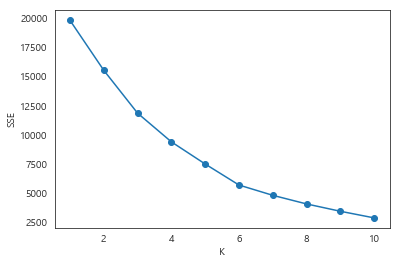

In [1052]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(df_clustering)

**분산 최소화 군집 : 6개**

In [1035]:
df_clustering = df_growth_cleansed.copy()

In [1036]:
df_clustering.iloc[:,1:5]=StandardScaler().fit_transform(df_clustering.iloc[:,1:5])
df_clustering=df_clustering.iloc[:,0:5].set_index('key')
df_clustering.head(1)

,key,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액,회사ID,년도,경기지수점수
1,122968-2016,0.37,0.26,-0.43,-0.13,122968,2016,0.20


In [1042]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
df_clustering.iloc[:,0:5].set_index('key', inplace=True)

In [1050]:
df_clustering=df_clustering.iloc[:,0:5].set_index('key')

In [1051]:
df_clustering

,평균성장율_연금보험료,평균성장율_직원수,평균성장율_인당매출액,성장율_연매출액
key,,,,
122968-2016,0.37,0.26,-0.43,-0.13
122968-2017,-0.26,-0.03,0.02,-0.02
122968-2018,-0.19,-0.09,-0.11,-0.08
122983-2016,-0.30,-0.17,-0.02,-0.10
122983-2017,-1.29,-1.42,2.42,-0.18
...,...,...,...,...
516653-2017,0.57,0.52,-0.62,-0.04
516653-2018,1.88,1.42,-0.34,-0.12
59533-2016,0.30,0.39,-0.54,-0.05


## 유니콘 기업 지수 산출 방향성 추가 논의 내역
1. 직원수로 class 구분 
2. 스코어링 지표 1-5점 척도
> - 1인당 매출액
> - 연성장율_연금보험료
> - 연성장율_직원수
> - 연성장율_매출액
> - 최대최소매출액
